# Perform data cleaning and exploratory data analysis(EDA) on a dataset. Explain the relationship between variables and identify patterns and trends in data

# The dataset used here is Orange Quality Analysis Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing

In [4]:
# Loading dataset
df = pd.read_csv('Orange Quality Data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [6]:
df.shape 

(241, 11)

In [7]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [8]:
# Checking for null values
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [9]:
numeric = df.select_dtypes(include=['float64', 'int64'])
numeric.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)',
       'Quality (1-5)'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

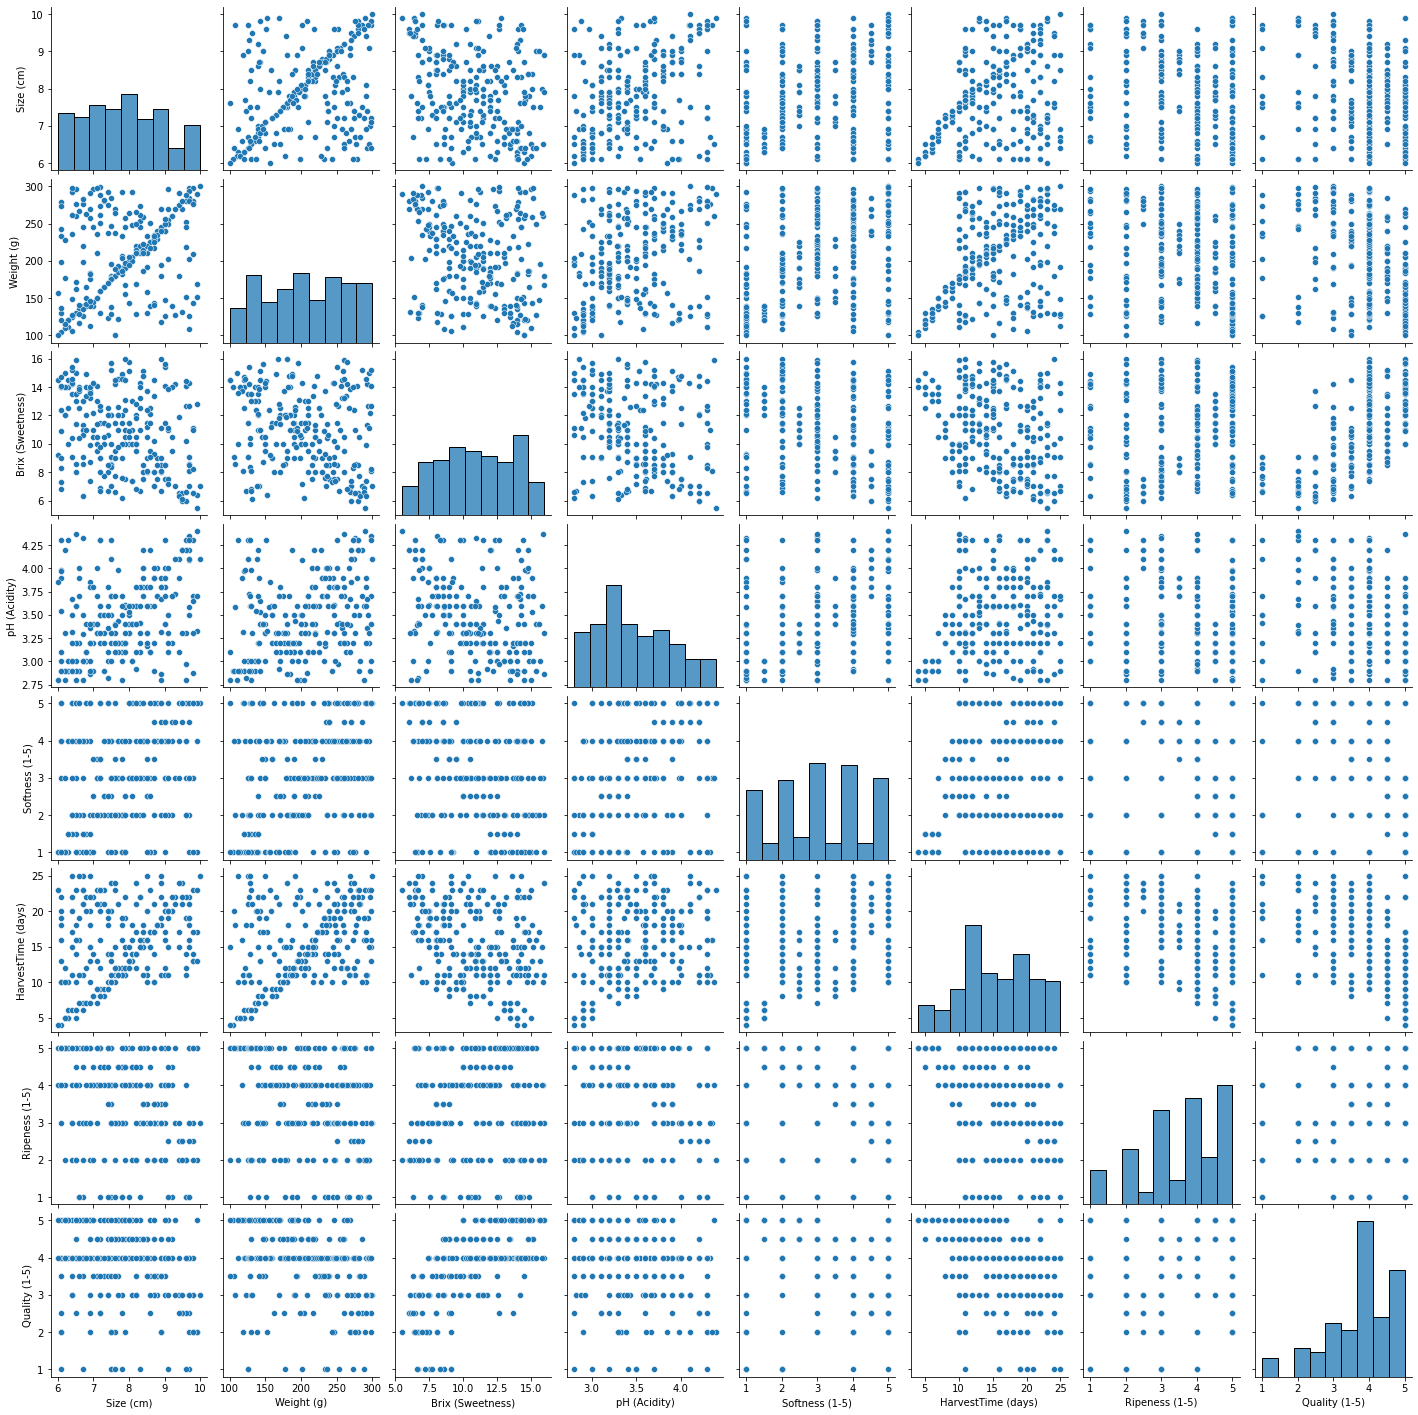

In [22]:
plt.figure(figsize=(20, 10))
sns.pairplot(numeric)
plt.show()

From the above scatter plot it is visible that :                                                                          
1. There is a positive correlation between size and weight & size and harvest time
2. There is a positive correlation between weight and harvest time

In [23]:
numeric.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
Size (cm),241.0,7.844813,1.086002,6.0,6.10,6.2,6.4,6.9,7.1,7.5,7.8,8.1,8.7,9.10,9.5,9.900,10.0
Weight (g),241.0,205.128631,56.461012,100.0,105.40,120.0,128.0,155.0,169.0,189.0,205.0,225.0,252.0,273.00,280.0,298.000,300.0
Brix (Sweetness),241.0,10.907884,2.760446,5.5,6.04,6.6,7.0,8.5,9.0,10.0,11.0,12.0,13.4,14.10,14.5,15.860,16.0
pH (Acidity),241.0,3.473900,0.421007,2.8,2.80,2.9,2.9,3.2,3.2,3.3,3.4,3.6,3.8,3.98,4.1,4.342,4.4
Softness (1-5),241.0,3.072614,1.323630,1.0,1.00,1.0,1.0,2.0,2.0,3.0,3.0,3.5,4.0,5.00,5.0,5.000,5.0
HarvestTime (days),241.0,15.344398,5.323852,4.0,5.00,6.0,9.0,11.0,12.0,13.0,15.0,17.0,20.0,22.00,23.0,25.000,25.0
Ripeness (1-5),241.0,3.599585,1.205214,1.0,1.00,1.0,2.0,3.0,3.0,3.5,4.0,4.0,4.5,5.00,5.0,5.000,5.0
Quality (1-5),241.0,3.817427,1.014410,1.0,1.00,2.0,2.5,3.0,3.5,4.0,4.0,4.0,4.5,5.00,5.0,5.000,5.0


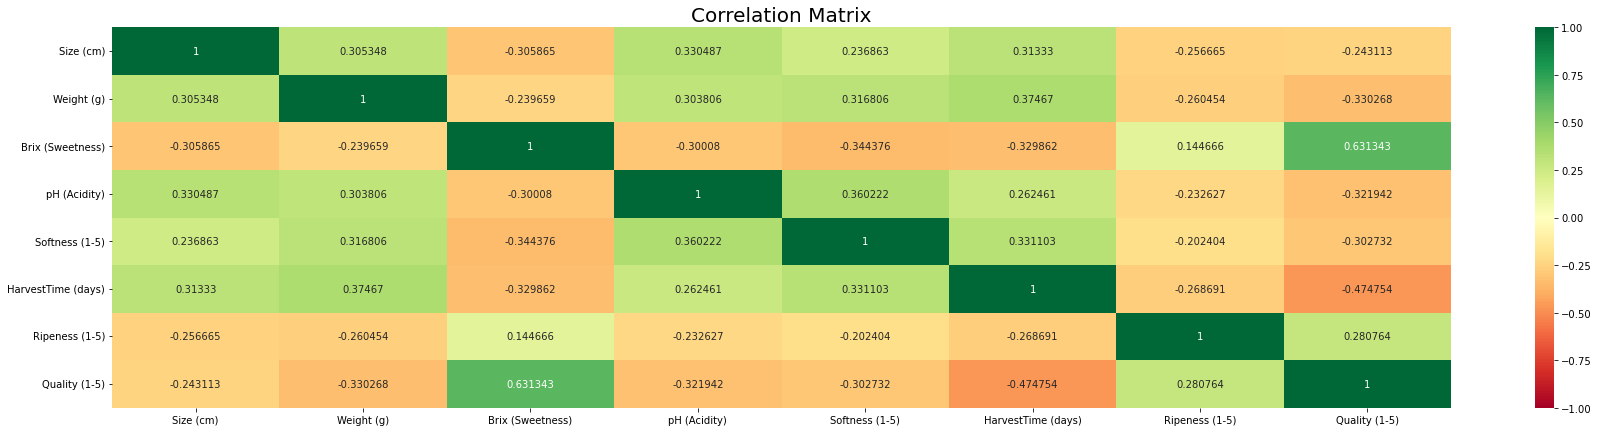

In [10]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(numeric.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

1. Size is positively correlated with Weight, pH, HarvestTime and negatively correlated with Brix
2. Weight is positively correlated with Size, pH, Softness, HarvestTime and negatively coreelated with Brix, Quality
3. Brix is highly positively correlated with Quality and negatively correlated with Size, Weight, pH, Softness, HarvestTime
4. pH is positively correlated with Size, Weight, Softness and negatively correlated with Brix and Quality
5. Softness is positively correlated with Weight, pH, HarvestTime and negatively correlated with Brix and Quality
6. HarvestTime is positively correlated with Size, Weight, Softness and negatively correlated with Brix and Quality
7. Ripeness is not much correlated with any other characteristics of orange
8. Quality is positively correlated with Brix and negatively correlated with Weight, pH, Softness, HarvestTime

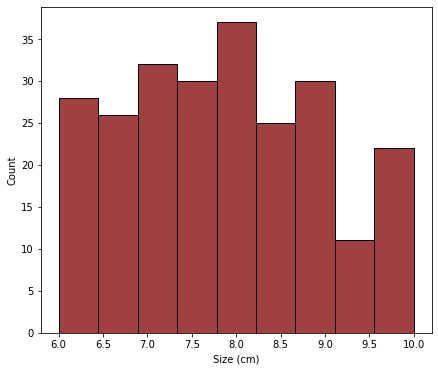

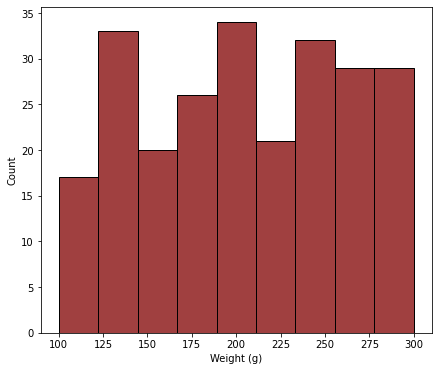

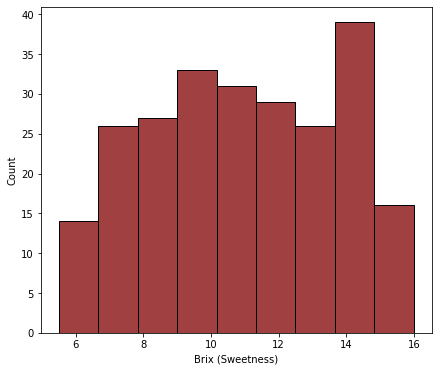

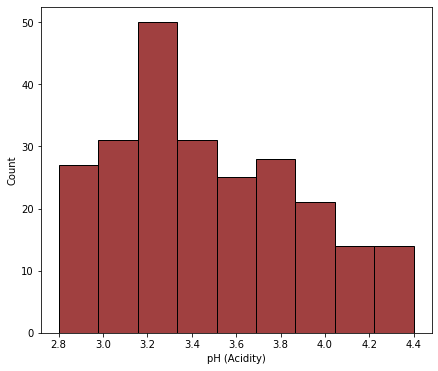

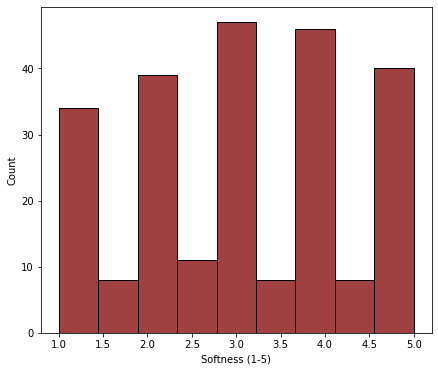

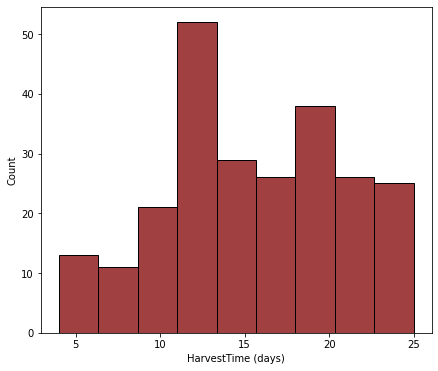

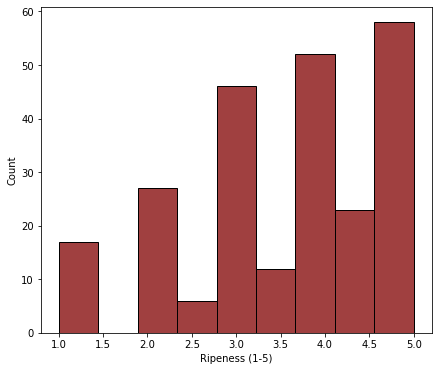

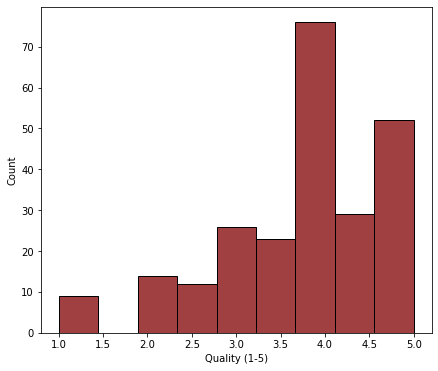

In [12]:
for cols in numeric:
    plt.figure(figsize=(7,6))
    sns.histplot(x=df[cols], data=df, color='maroon')
    plt.show()

1. The size of most of oranges is 8cm.
2. Highest number of oranges have weight in the range of 125 - 200g and 250g.
3. Large number of oranges have a pH value in the range of 3.2 - 3.4
4. More number of oranges have been harvested in 10-15 days
5. Most of the oranges are ripen
6. Most of the oranges are of high quality(in the range of 4)

In [13]:
categorical = df.select_dtypes(include = "object")
categorical.columns

Index(['Color', 'Variety', 'Blemishes (Y/N)'], dtype='object')

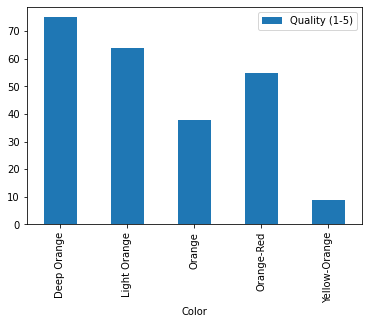

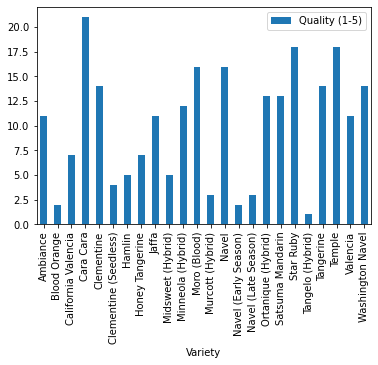

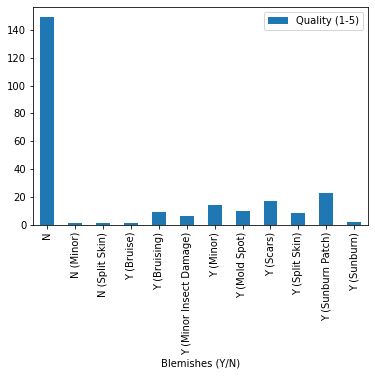

In [14]:
for cols in categorical:
    groups = df.groupby(cols).count().reset_index()
    groups.plot(kind='bar',x=cols,y='Quality (1-5)')
    groups

1. Binning values of Y(Bruis) and Y(Bruising)                                                                                 
2. Binning values of  Y (Sunburn Patch) and Y (Sunburn)

# Binning

This is a feature engineering technique   

For Blemishes (Y/N) the condition it checks is whether or not the original value is in the list [N','Y (Sunburn Patch)','Y (Scars)','Y (Minor)', 'Y (Mold Spot)', 'Y (Bruising)','Y (Split Skin)','Y (Minor Insect Damage)','Y (Sunburn)', N (Minor)', 'N (Split Skin)']. If it is, then np.where() simply returns the original  Blemishes (Y/N) (it is returned as title case). If the Blemishes (Y/N) code is not in that list, np.where() returns “Y (Bruising)”.                                                                                   

In [15]:
df['Blemishes (Y/N)'] = np.where(df['Blemishes (Y/N)'].isin(['N','Y (Sunburn Patch)','Y (Scars)','Y (Minor)',
                                  'Y (Mold Spot)', 'Y (Bruising)','Y (Split Skin)','Y (Minor Insect Damage)', 'Y (Sunburn)',
                                'N (Minor)', 'N (Split Skin)']), df['Blemishes (Y/N)'].str.title(), 'Y (Bruising)')

For Blemishes (Y/N) the condition it checks is whether or not the original value is in the list [N','Y (Sunburn Patch)','Y (Scars)','Y (Minor)', 'Y (Mold Spot)', 'Y (Bruising)','Y (Split Skin)','Y (Minor Insect Damage)', N (Minor)', 'N (Split Skin)']. If it is, then np.where() simply returns the original Blemishes (Y/N) (it is returned as title case). If the Blemishes (Y/N) code is not in that list, np.where() returns “Y (Sunburn Patch)”.

In [16]:
df['Blemishes (Y/N)'] = np.where(df['Blemishes (Y/N)'].isin(['N','Y (Sunburn Patch)','Y (Scars)','Y (Minor)',
                                  'Y (Mold Spot)', 'Y (Bruising)','Y (Split Skin)','Y (Minor Insect Damage)',
                                'N (Minor)', 'N (Split Skin)']), df['Blemishes (Y/N)'].str.title(), 'Y (Sunburn Patch)')

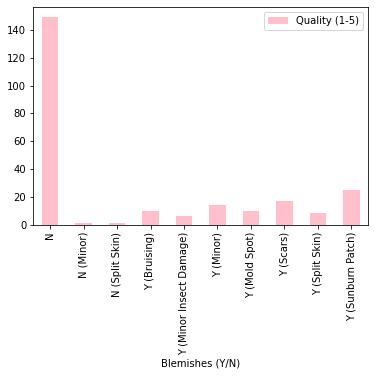

In [17]:
groups = df.groupby('Blemishes (Y/N)').count().reset_index()
groups.plot(kind='bar',x='Blemishes (Y/N)',y='Quality (1-5)', color='pink')
plt.show()

# Label Encoding

In [18]:
label_encoder = preprocessing.LabelEncoder()

for cols in categorical:
    # Encode labels in column .
    categorical[cols]= label_encoder.fit_transform(categorical[cols])
    categorical[cols].unique()

In [19]:
categorical.head()

,Color,Variety,Blemishes (Y/N)
0,2,22,0
1,0,13,0
2,1,3,0
3,3,1,0
4,2,6,6
